<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Overview</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview<br></a></span></li></ul></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation analysis</a></span><ul class="toc-item"><li><span><a href="#Additionally..." data-toc-modified-id="Additionally...-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Additionally...</a></span></li></ul></li></ul></div>

<a id='top'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv("\\customers.csv")
products = pd.read_csv("\\products.csv")
sales = pd.read_csv("\\transactions.csv")

<a id='task_1'></a>

# Data cleaning
<hr style="border:1.5px solid blalck"></hr>

## Overview
<font color='blue'>For each table I start by looking for NaNs, duplicates and irregular values (values that doesn't fit the format or out of range).<br>
During this process, 1 product with negative price was discovered. It appears to be a product for test purposes. I removed it from product table and subsquently the transactions of this product and clients related to these test transactions. [See script](#task1_1) </font> <br>

<font color='blue'>Next I looked for products/clients who exists in the transaction table, but not in product/client table. 1 product was found to have been sold but no record in the product table, and thus no price tag. A price is then assigned to it, which is the price mean of its category. [See scripte](#task_1_2)</font> 

<font color='blue'>Once the tables have been cleaned, I created following variables that might be needed for later analysis [See script](#task1_3):
> - Session duration in minutes
> - Client age
> - Transaction date as in 
>> <ul>
>> <li>weekday</li>
>> <li>day of month</li>
>> <li>month of the year</li>
>> </ul>   
</font>

<font color='blue'>Finally I joint three tables together to create one main dataframe I will use for analysis. After joining all three tables I could also add a final variable: total purchase amount per session. [See script](#task1_4)
</font>

In [3]:
customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Looking for NaN values in customer table
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
# Looking for duplicate client id in customer table
customer.client_id.duplicated().value_counts()

False    8623
Name: client_id, dtype: int64

In [6]:
# Looking for irregular entries for the gender column in customer table
customer.sex.value_counts()

f    4491
m    4132
Name: sex, dtype: int64

In [7]:
# Looking for irregular birth year in the birth column in customer table
customer.birth.describe()

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

In [8]:
# Looking for irregular entries for the birth columnin customer table
customer.birth.astype(str).str.len().value_counts()

4    8623
Name: birth, dtype: int64

In [9]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
# Looking for NaN values in products table
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
# Looking for duplicated entries in products table
products.id_prod.duplicated().value_counts()

False    3287
Name: id_prod, dtype: int64

<a id='task1_1'></a>

In [12]:
# Looking for irregular product price
products.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

In [13]:
# Identify all products with prices below zero
products[products["price"] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


<font color='blue'>Investigating transactions of product T_0 and the clients who bought it.</font>

In [14]:
sales.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


<font color='blue'>Transactions of product id T_0 are...</font>

In [15]:
sales[sales["id_prod"] == "T_0"]

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [16]:
sales[sales["id_prod"] == "T_0"].session_id.value_counts()

s_0    200
Name: session_id, dtype: int64

<font color='blue'>Clients who bought product T_0 are...</font>

In [17]:
sales[sales["id_prod"] == "T_0"].client_id.value_counts()

ct_0    106
ct_1     94
Name: client_id, dtype: int64

<font color='blue'>Removing product T_0, sales session s_0 and clients ct_0 & ct_1.</font>

In [18]:
products = products[products["id_prod"] != "T_0"]

In [19]:
sales = sales[sales["session_id"] != "s_0"]

In [20]:
customer = customer[customer["client_id"] != "ct_0"]
customer = customer[customer["client_id"] != "ct_1"]
customer

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [21]:
# Looking for NaN values in sales table
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336816 non-null  object
 1   date        336816 non-null  object
 2   session_id  336816 non-null  object
 3   client_id   336816 non-null  object
dtypes: object(4)
memory usage: 12.8+ MB


In [22]:
# Change date column into datetime object
sales["date"] = pd.to_datetime(sales.date)

<a id='task_1_2'></a>

<font color='blue'>Looking for clients that are in the transaction table, but not in client table.</font>

In [23]:
customer_client_id = customer.client_id.unique()
sales_client_id = sales.client_id.unique()
missing_client_id = np.setdiff1d(
    sales_client_id, customer_client_id, assume_unique=True
)
missing_client_id

array([], dtype=object)

<font color='blue'>Seems like every client who placed an order exists in the client table.</font>

<font color='blue'>Moving on. Looking for products that are in the transaction table, but not in product table.</font>

In [24]:
product_id = products.id_prod.unique()
sales_product_id = sales.id_prod.unique()
missing_product_id = np.setdiff1d(sales_product_id, product_id, assume_unique=True)
missing_product_id

array(['0_2245'], dtype=object)

<font color='blue'>Product '0_2245' is present in the sales table but not in product table. Further investigation is needed before deciding what to do with it.</font>

In [25]:
# Looking for the number of transactions on this product
sales[sales["id_prod"] == "0_2245"]

,id_prod,date,session_id,client_id
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580
...,...,...,...,...
322710,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167
329417,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790
330490,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189
335531,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595


<font color='blue'>As there are considerable number of transactions related product 0_2245, it cannot simply be removed. I need to give it a price value.</font>

In [26]:
# Looking for pricing logic amongst consecutive product id.
products[
    products["id_prod"].isin(
        [
            "0_2240",
            "0_2241",
            "0_2242",
            "0_2243",
            "0_2244",
            "0_2245",
            "0_2246",
            "0_2247",
            "0_2248",
            "0_2249",
            "0_2250",
        ]
    )
]

,id_prod,price,categ
331,0_2249,2.99,0
388,0_2246,6.30,0
778,0_2247,2.99,0
1303,0_2242,31.79,0
1367,0_2250,20.77,0
1725,0_2244,8.37,0
2482,0_2241,10.99,0
2552,0_2240,3.67,0
2815,0_2243,8.99,0
3211,0_2248,19.58,0


<font color='blue'>No correlation between the order of product ids and their prices.<br>
What about by category?</font>

In [27]:
products[products["categ"] == 0].describe()

,price,categ
count,2308.000000,2308.0
mean,11.732795,0.0
std,7.565755,0.0
min,0.620000,0.0
25%,5.587500,0.0
50%,10.320000,0.0
75%,16.655000,0.0
max,40.990000,0.0


In [28]:
products[products["categ"] == 1].describe()

,price,categ
count,739.000000,739.0
mean,25.531421,1.0
std,15.425162,0.0
min,2.000000,1.0
25%,13.390000,1.0
50%,22.990000,1.0
75%,33.990000,1.0
max,80.990000,1.0


In [29]:
products[products["categ"] == 2].describe()

,price,categ
count,239.000000,239.0
mean,108.354686,2.0
std,49.561431,0.0
min,30.990000,2.0
25%,71.065000,2.0
50%,101.990000,2.0
75%,136.530000,2.0
max,300.000000,2.0


<font color='blue'>Product prices seem to vary per category, ie.categ 0 seem to be on the lower end of the product price range, categ 1 in the middle range, and categ 2 on the higher end.<br>
Assigning the price mean of product categ 0 to product 0_2245, which is 11.73.</font>

In [30]:
new_prod = {"id_prod": "0_2245", "price": 11.73, "categ": 0}
products = products.append(new_prod, ignore_index=True)

In [31]:
products[products["id_prod"] == "0_2245"]

,id_prod,price,categ
3286,0_2245,11.73,0


<font color='blue'>Creating new variables.</font>

In [32]:
# Creating variable: customer's age
customer["age"] = 2022 - customer["birth"]
customer

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


<a id='task1_3'></a>

<font color='blue'>Creating variable: session duration</font>

In [33]:
# Create a new table with start time of each session
duration = (
    sales.groupby("session_id")["date"].min().to_frame().sort_values(by="session_id")
)
duration.reset_index(inplace=True)
duration = duration.rename(columns={"date": "start"})
duration

,session_id,start
0,s_1,2021-03-01 00:01:07.843138
1,s_10,2021-03-01 00:10:33.163037
2,s_100,2021-03-01 04:12:43.572994
3,s_1000,2021-03-03 02:38:09.568389
4,s_10000,2021-03-22 17:46:05.819130
...,...,...
169189,s_99994,2021-10-04 18:34:24.208113
169190,s_99995,2021-10-04 18:35:32.201073
169191,s_99996,2021-10-04 18:38:36.333661
169192,s_99997,2021-10-04 18:45:38.003516


In [34]:
# Create a new table with finish time of each session
duration_max = sales.groupby("session_id")["date"].max().to_frame()
duration_max.reset_index(inplace=True)
duration_max

,session_id,date
0,s_1,2021-03-01 00:01:07.843138
1,s_10,2021-03-01 00:10:33.163037
2,s_100,2021-03-01 04:43:58.025677
3,s_1000,2021-03-03 03:25:12.320225
4,s_10000,2021-03-22 18:15:03.831240
...,...,...
169189,s_99994,2021-10-04 18:56:23.112236
169190,s_99995,2021-10-04 18:35:32.201073
169191,s_99996,2021-10-04 18:58:49.228317
169192,s_99997,2021-10-04 18:45:38.003516


In [35]:
duration["finish"] = duration_max["date"]
duration

,session_id,start,finish
0,s_1,2021-03-01 00:01:07.843138,2021-03-01 00:01:07.843138
1,s_10,2021-03-01 00:10:33.163037,2021-03-01 00:10:33.163037
2,s_100,2021-03-01 04:12:43.572994,2021-03-01 04:43:58.025677
3,s_1000,2021-03-03 02:38:09.568389,2021-03-03 03:25:12.320225
4,s_10000,2021-03-22 17:46:05.819130,2021-03-22 18:15:03.831240
...,...,...,...
169189,s_99994,2021-10-04 18:34:24.208113,2021-10-04 18:56:23.112236
169190,s_99995,2021-10-04 18:35:32.201073,2021-10-04 18:35:32.201073
169191,s_99996,2021-10-04 18:38:36.333661,2021-10-04 18:58:49.228317
169192,s_99997,2021-10-04 18:45:38.003516,2021-10-04 18:45:38.003516


In [36]:
duration["duration_minute"] = (duration["finish"] - duration["start"]) / pd.Timedelta(
    minutes=1
)
duration = duration.drop(columns=["start", "finish"])
duration

,session_id,duration_minute
0,s_1,0.000000
1,s_10,0.000000
2,s_100,31.240878
3,s_1000,47.045864
4,s_10000,28.966869
...,...,...
169189,s_99994,21.981735
169190,s_99995,0.000000
169191,s_99996,20.214911
169192,s_99997,0.000000


In [37]:
sales = sales.merge(duration, on="session_id")
sales

,id_prod,date,session_id,client_id,duration_minute
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415
3,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,46.287874
4,2_236,2022-02-03 02:42:10.548862,s_159142,c_277,46.287874
...,...,...,...,...,...
336811,0_153,2021-10-17 12:47:22.803642,s_106129,c_682,0.000000
336812,1_282,2021-06-01 12:14:28.924898,s_42561,c_2945,0.000000
336813,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,0.000000
336814,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,0.000000


In [38]:
# Creating variables:
# - Day of the week
# - Day of the month
# - Month of the year
sales["date_no_time"] = sales.date.dt.date
sales["weekday"] = sales.date.dt.day_name()
sales["month"] = sales.date.dt.to_period("M")
sales["day_of_month"] = sales.date.dt.day
sales

,id_prod,date,session_id,client_id,duration_minute,date_no_time,weekday,month,day_of_month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10
3,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,46.287874,2022-02-03,Thursday,2022-02,3
4,2_236,2022-02-03 02:42:10.548862,s_159142,c_277,46.287874,2022-02-03,Thursday,2022-02,3
...,...,...,...,...,...,...,...,...,...
336811,0_153,2021-10-17 12:47:22.803642,s_106129,c_682,0.000000,2021-10-17,Sunday,2021-10,17
336812,1_282,2021-06-01 12:14:28.924898,s_42561,c_2945,0.000000,2021-06-01,Tuesday,2021-06,1
336813,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,0.000000,2021-05-28,Friday,2021-05,28
336814,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,0.000000,2021-03-16,Tuesday,2021-03,16


<a id='task1_4'></a>

<font color='blue'>Joinning the three tables, customer/product/sales, to create the main table used for analysis.</font>

In [39]:
data = pd.merge(pd.merge(sales, products, on="id_prod"), customer, on="client_id")
data

,id_prod,date,session_id,client_id,duration_minute,date_no_time,weekday,month,day_of_month,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45
2,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45
3,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45
4,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,13.260697,2021-09-29,Wednesday,2021-09,29,3.99,0,f,1977,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,0.000000,2021-07-23,Friday,2021-07,23,181.99,2,f,2001,21
336812,2_147,2021-12-05 00:31:15.530765,s_129519,c_4540,0.000000,2021-12-05,Sunday,2021-12,5,181.99,2,m,2003,19
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,0.000000,2021-09-25,Saturday,2021-09,25,26.99,1,f,1967,55
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,0.000000,2021-09-15,Wednesday,2021-09,15,13.36,0,f,1970,52


<font color='blue'>Create new variable: total purchase per session</font>

In [40]:
# Using groupby&sum to get total sum of purchase per session
total_purchase = data.groupby("session_id")["price"].sum().to_frame()
total_purchase.reset_index(inplace=True)
total_purchase

,session_id,price
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49
...,...,...
169189,s_99994,28.92
169190,s_99995,19.84
169191,s_99996,56.27
169192,s_99997,6.99


In [41]:
# Rename a column for later table join
total_purchase = total_purchase.rename(columns={"price": "total_purchase_per_session"})
total_purchase

,session_id,total_purchase_per_session
0,s_1,11.99
1,s_10,26.99
2,s_100,33.72
3,s_1000,39.22
4,s_10000,41.49
...,...,...
169189,s_99994,28.92
169190,s_99995,19.84
169191,s_99996,56.27
169192,s_99997,6.99


In [42]:
data = data.astype({"session_id": "str"})
total_purchase = total_purchase.astype({"session_id": "str"})
data = data.merge(total_purchase, on="session_id", how="inner")
data

,id_prod,date,session_id,client_id,duration_minute,date_no_time,weekday,month,day_of_month,price,categ,sex,birth,age,total_purchase_per_session
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45,24.97
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45,24.97
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45,24.97
3,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45,57.66
4,0_1152,2022-01-08 17:33:13.386306,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,10.70,0,f,1977,45,57.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,0.000000,2021-07-23,Friday,2021-07,23,181.99,2,f,2001,21,181.99
336812,2_147,2021-12-05 00:31:15.530765,s_129519,c_4540,0.000000,2021-12-05,Sunday,2021-12,5,181.99,2,m,2003,19,181.99
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,0.000000,2021-09-25,Saturday,2021-09,25,26.99,1,f,1967,55,26.99
336814,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,0.000000,2021-09-15,Wednesday,2021-09,15,13.36,0,f,1970,52,13.36


In [43]:
data.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'duration_minute',
       'date_no_time', 'weekday', 'month', 'day_of_month', 'price', 'categ',
       'sex', 'birth', 'age', 'total_purchase_per_session'],
      dtype='object')

In [44]:
# Rename columns with more descriptive names
data.columns = [
    "id_prod",
    "purchase_date",
    "session_id",
    "client_id",
    "session_duration_minute",
    "session_date",
    "session_weekday",
    "session_month",
    "session_day_of_month",
    "product_price",
    "product_categ",
    "client_sex",
    "client_birth",
    "client_age",
    "total_purchase_per_session",
]

[Back to task overview](#task_1)

[Back to top](#top)

<a id='task_2'></a>

# EDA
<hr style="border:1.5px solid blalck"> </hr>

## Overview<br>
Now you can analyze your data. Your manager has given you a high degree of freedom on this task, so it’s is up to you to find the most relevant information. <br>

To test your skills, your manager want you to use at least:
<br>
- Indicators of central tendency and dispersion.<br>
>    <font color='blue'>Analysis of central tendency and dispersion for session duration (minute):  [See script](#task2_1_1)</font>
| Mean | Median | Mode | Variance | Standard deviation |
|:---:|:---:|:---:|:---:|:---:
| 26.24 | 23.68 | 0, 41.69 |  313.97 | 17.72 |
<br>

>    <font color='blue'>The average session duration is at 26 minutes, with 17 minutes of variations toward both longer and shorter ends of the spectrum.<br></font> 
<br>
>    <font color='blue'>Additionally, by looking at a histogram of the client age distribution, we can see that the majority clients are under 60 years old. [See script](#task2_1_2)<br></font> 
    
    

- A concentration analysis, using a Lorenz curve and a Gini coefficient.<br>
    <font color='blue'>The Gini coefficient for number of client vs total purchase per client is 0.48. This tells that client purchase amount is not venly distributed amongst clients, indicating potential outliers (clients who buy way more than the others). [See script](#task2_2) </font>
<br>
<br>
- Graphic representations, including at least one histogram, a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).<br>
- Bivariate analyses.
>    <font color='blue'>Analysis of monthly revenue. The time series graph reveals that there was a peak of revenue in September 2021, followed immediately by a sharp drop in October 2021. Analysis indicates that 
>    - a).the peak in September sales is possibly caused by sudden sales increase of product category 0; 
>    - b).the drop in sales are caused by absence of revenue from category 1 productsfrom 2 to 27 October. [See script](#task_2_4) </font>

<hr style="border:1.5px solid blalck"> </hr>

In [45]:
data.head()

,id_prod,purchase_date,session_id,client_id,session_duration_minute,session_date,session_weekday,session_month,session_day_of_month,product_price,product_categ,client_sex,client_birth,client_age,total_purchase_per_session
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45,24.97
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45,24.97
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45,24.97
3,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45,57.66
4,0_1152,2022-01-08 17:33:13.386306,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,10.70,0,f,1977,45,57.66


<a id="task2_1_1"></a>
<font color='blue'>Indicators of central tendency and dispersion.</font>

──────────────────────────────────────────────────
Central tendency for session duration (minute)
mean:
 26.23767580160266
median:
 23.677146116666666
mode:
 0    41.69309
dtype: float64
variance:
 313.9365104387783
standard diviation:
 17.7182535944934


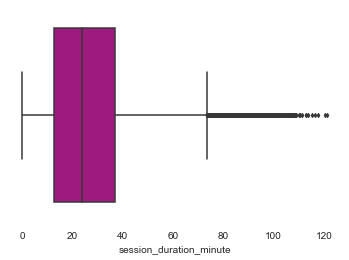

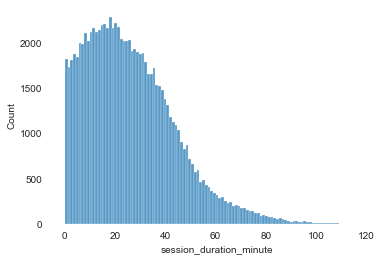

In [46]:
data_sub1 = data.drop_duplicates(subset=["session_id"])
data_sub1 = data_sub1[
    data_sub1["session_duration_minute"] > 0
]  # excluding session duration that are 0 minuite.
print(u"\u2500" * 50)
print("Central tendency for session duration (minute)")
print("mean:\n", data_sub1["session_duration_minute"].mean())
print("median:\n", data_sub1["session_duration_minute"].median())
print("mode:\n", data_sub1["session_duration_minute"].mode())
print("variance:\n", data_sub1["session_duration_minute"].var(ddof=0))
print("standard diviation:\n", data_sub1["session_duration_minute"].std(ddof=0))
sns.set_style("white")
sns.boxplot(
    x=data_sub1["session_duration_minute"], data=data_sub1, color="#B3058A", fliersize=3
)
plt.box(False)
plt.show()

sns.histplot(data=data_sub1, x="session_duration_minute", kde=False)
plt.box(False)
plt.show()

<font color='blue'>Most sessions last between 15 and 38 minutes. The median sits at 23min. Spreads 17min towards both directions.</font>

<a id="task2_1.2"></a>

<hr style="border:1.5px solid blalck"> </hr>

<font color='blue'>A concentration analysis, using a Lorenz curve and a Gini coefficient for the cumulative number of client and their purchase amount, to verify whether the sales are evenly spread between all clients or rather concentrated between just a few clients.</font>
<a id='task2_2'></a>

In [47]:
data.head()

,id_prod,purchase_date,session_id,client_id,session_duration_minute,session_date,session_weekday,session_month,session_day_of_month,product_price,product_categ,client_sex,client_birth,client_age,total_purchase_per_session
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45,24.97
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45,24.97
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45,24.97
3,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45,57.66
4,0_1152,2022-01-08 17:33:13.386306,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,10.70,0,f,1977,45,57.66


In [48]:
# Creating the subset
lorenz_subset = data.groupby("client_id")["total_purchase_per_session"].sum().to_frame()
lorenz_subset.reset_index(inplace=True)
lorenz_subset.columns = ["client_id", "total_purchase_per_client"]
lorenz_subset

,client_id,total_purchase_per_client
0,c_1,715.42
1,c_10,1360.18
2,c_100,486.11
3,c_1000,1958.82
4,c_1001,4359.66
...,...,...
8595,c_995,198.18
8596,c_996,960.70
8597,c_997,1402.37
8598,c_998,3705.35


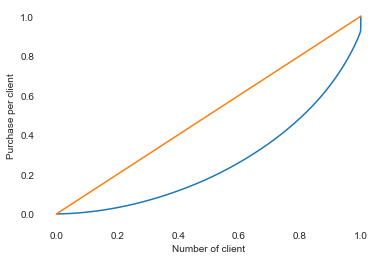

In [49]:
n = len(lorenz_subset["total_purchase_per_client"].values)
lorenz_y = (
    np.cumsum(lorenz_subset["total_purchase_per_client"].sort_values())
    / lorenz_subset["total_purchase_per_client"].sum()
)
lorenz_y = np.append([0], lorenz_y)

sns.set_style("white")
xaxis = np.linspace(0 - 1 / n, 1 + 1 / n, n + 1)
plt.plot(xaxis, lorenz_y, drawstyle="steps-post")
plt.plot([0, 1], [0, 1])
plt.xlabel("Number of client")
plt.ylabel("Purchase per client")
plt.box(False)
plt.show()

<font color='blue'>This graph indicates that the revenues are not very evenly distributed amongst clients. There might be a few clients who is buying much more than the rest.</font>

In [50]:
def gini(arr):
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2.0 / n
    const_ = (n + 1.0) / n
    weighted_sum = sum([(i + 1) * yi for i, yi in enumerate(sorted_arr)])
    return coef_ * weighted_sum / (sorted_arr.sum()) - const_


gini(lorenz_subset["total_purchase_per_client"].values)

0.4815092376913095

<font color='blue'>The gini coefficient again indicates that the revenue is spread not equaly among clients.</font>

<font color='blue'>Let's find out who are buying more than the rest.</font>

In [51]:
# Identify top clients
data.groupby("client_id")["total_purchase_per_session"].sum().sort_values(
    ascending=False
).head(10)

client_id
c_1609    471910.33
c_6714    310894.70
c_4958    234834.56
c_3454     77933.83
c_3263      8985.83
c_7319      8695.03
c_3725      8682.62
c_6775      8413.23
c_4023      8218.01
c_2140      8128.43
Name: total_purchase_per_session, dtype: float64

<font color='blue'>Top 4 clients are buying much more than the rest.</font>

In [52]:
# Creating a variable of top 4 client for possible future use.
top_4_client = ["c_1609", "c_6714", "c_4958", "c_3454"]

In [53]:
top_4_client_purchase = (
    data[data["client_id"].isin(top_4_client)]["total_purchase_per_session"]
    .sum()
    .round(2)
)
total_revenue = data["total_purchase_per_session"].sum().round(2)
print("Revenue from top 4 clients:", top_4_client_purchase)
print("Total revenue:", total_revenue)

Revenue from top 4 clients: 1095573.42
Total revenue: 14866209.35


In [54]:
# Percentage of revenue from top 4 clients
top_4_client_purchase / total_revenue

0.07369554633643041

<font color='blue'>Analysis of monthly revenue represented in time series graph</font>
<a id='task_2_4'></a>

Text(0.5, 1.0, 'Monthly Revenue')

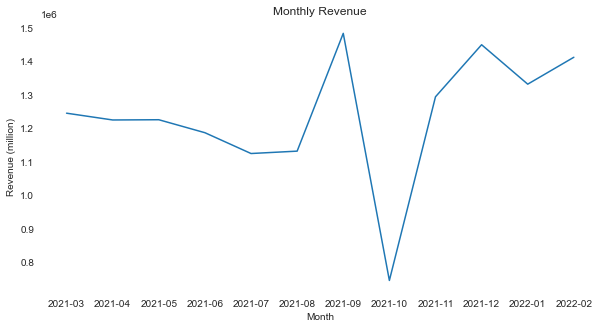

In [55]:
month = data["session_month"].astype(str).sort_values().unique()
revenue = data.groupby("session_month")["total_purchase_per_session"].sum()

fig, ax = plt.subplots(figsize=(10, 5))
plt.box(False)
ax.plot(month, revenue)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue (million)")
ax.set_title("Monthly Revenue")

<font color='blue'>Investigation of the sudden peak and drop in revenue in September and October 2021</font>

In [56]:
# Creating subset with data of only interested time period: September and October
data_oct = data[data["session_month"] == "2021-10"]

daily_sales_oct = (
    data_oct.groupby(["session_day_of_month", "product_categ"])[
        "total_purchase_per_session"
    ]
    .sum()
    .to_frame()
)
daily_sales_oct.reset_index(inplace=True)
daily_sales_oct

,session_day_of_month,product_categ,total_purchase_per_session
0,1,0,28086.97
1,1,1,16307.29
2,1,2,4530.71
3,2,0,20324.19
4,2,2,2394.71
...,...,...,...
62,30,1,15284.39
63,30,2,4100.47
64,31,0,22741.59
65,31,1,16637.40


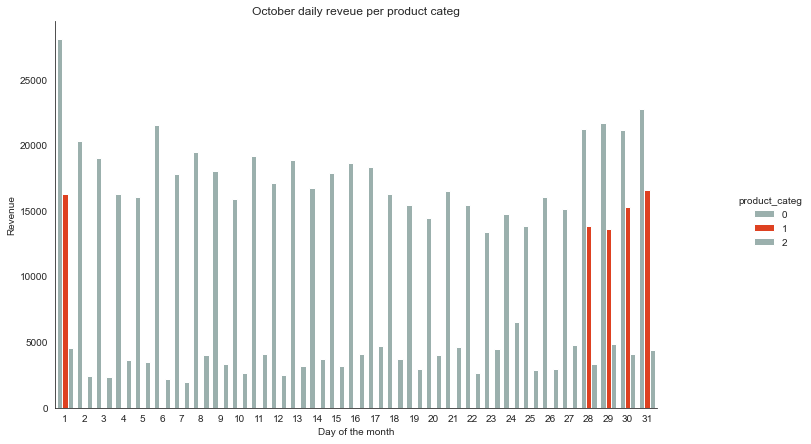

In [57]:
# Visualizing daily revenue movement per product category
colors_1 = ["#98b3af", "#fd2c02", "#98b3af"]
sns.set_palette(sns.color_palette(colors_1))

sns.catplot(
    x="session_day_of_month",
    y="total_purchase_per_session",
    hue="product_categ",
    data=daily_sales_oct,
    kind="bar",
).set(
    title="October daily reveue per product categ",
    xlabel="Day of the month",
    ylabel="Revenue",
)
plt.gcf().set_size_inches(12, 6)
plt.show()

<font color='blue'>Notably products in category 1 is absent from 2-27 October transactions.</font>

In [58]:
# Investigate yearly revenue per product category.
revenue_per_product_categ = (
    data.groupby(["session_month", "product_categ"])["total_purchase_per_session"]
    .sum()
    .to_frame()
)
revenue_per_product_categ.reset_index(inplace=True)
revenue_per_product_categ

,session_month,product_categ,total_purchase_per_session
0,2021-03,0,701550.49
1,2021-03,1,405150.59
2,2021-03,2,139316.83
3,2021-04,0,730682.77
4,2021-04,1,335370.06
5,2021-04,2,159678.11
6,2021-05,0,686205.94
7,2021-05,1,354900.96
8,2021-05,2,185340.36
9,2021-06,0,586829.04


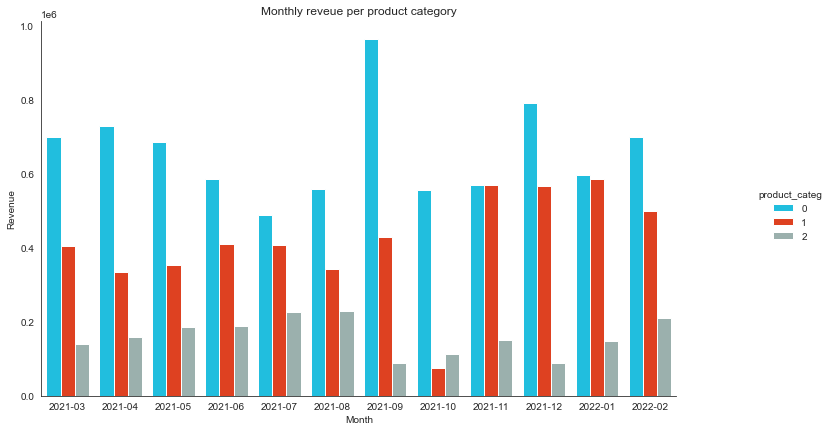

In [59]:
# Visualization
colors_2 = ["#02d3fd", "#fd2c02", "#98b3af"]
sns.set_palette(sns.color_palette(colors_2))

sns.catplot(
    x="session_month",
    y="total_purchase_per_session",
    hue="product_categ",
    data=revenue_per_product_categ,
    kind="bar",
).set(title="Monthly reveue per product category", xlabel="Month", ylabel="Revenue")
plt.gcf().set_size_inches(12, 6)
plt.show()

<font color='blue'>Sudden increase in revenue from product category 0 in September, possible explination for revenue peak in that month. Low revenue from product category 1 in October, possible explanation for revenue drop in that month.</font>

<font color='blue'>Bivariate analyses of weekday and number of purchases.
</font>

In [60]:
data.head()

,id_prod,purchase_date,session_id,client_id,session_duration_minute,session_date,session_weekday,session_month,session_day_of_month,product_price,product_categ,client_sex,client_birth,client_age,total_purchase_per_session
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45,24.97
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45,24.97
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45,24.97
3,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45,57.66
4,0_1152,2022-01-08 17:33:13.386306,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,10.70,0,f,1977,45,57.66


In [61]:
weekday_qty_session = data.groupby("session_weekday")["session_id"].nunique().to_frame()
weekday_qty_session.reset_index(inplace=True)
weekday_qty_session

,session_weekday,session_id
0,Friday,24608
1,Monday,24735
2,Saturday,24214
3,Sunday,24289
4,Thursday,24403
5,Tuesday,24326
6,Wednesday,24206


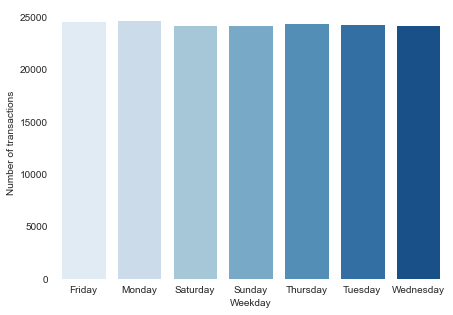

In [62]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x=weekday_qty_session["session_weekday"],
    y=weekday_qty_session["session_id"],
    data=weekday_qty_session,
    ci=None,
    palette="Blues",
)
plt.xlabel("Weekday")
plt.ylabel("Number of transactions")
plt.box(False)
plt.show()

<font color='blue'>No noticable difference between weekday and revenue.</font>

[Back to task overview](#task_2)<br>
[Back to top](#top)

<a id='task_3'></a>

# Correlation analysis
<hr style="border:1.5px solid blalck"> </hr>

In [63]:
data.head()

,id_prod,purchase_date,session_id,client_id,session_duration_minute,session_date,session_weekday,session_month,session_day_of_month,product_price,product_categ,client_sex,client_birth,client_age,total_purchase_per_session
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,4.99,0,f,1977,45,24.97
1,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,15.99,1,f,1977,45,24.97
2,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,12.323415,2021-04-10,Saturday,2021-04,10,3.99,0,f,1977,45,24.97
3,1_685,2022-01-08 17:01:39.106131,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,15.99,1,f,1977,45,57.66
4,0_1152,2022-01-08 17:33:13.386306,s_146917,c_4450,35.715387,2022-01-08,Saturday,2022-01,8,10.70,0,f,1977,45,57.66


<font color='blue'>Before performing analysis, outliers need to be taken out as they will affect greatly the result.</font>

In [64]:
data = data[~data["client_id"].isin(top_4_client)]

<hr style="border:1.5px solid blalck"> </hr>
Correlation between gender and categories of products purchased<br>
<font color='blue'>
A contingency table.<br>
Chi square test of independence.
</font>
<a id='task_3_1'></a>

In [65]:
# Generating a contingency table
gender = "client_sex"
categ = "product_categ"

contingency_gender_categ = data[[gender, categ]].pivot_table(
    index=gender, columns=categ, aggfunc=len, margins=True, margins_name="Total"
)
contingency_gender_categ

product_categ,0,1,2,Total
client_sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


<font color='blue'>Calculating degrees of freedom.</font>

In [66]:
degree_freedom = (len(contingency_gender_categ.index) - 2) * (
    len(contingency_gender_categ.columns) - 2
)
degree_freedom

2

 <font color='blue'>Calculating chi_square statistics.</font>

In [67]:
expected_ratio = (
    contingency_gender_categ["Total"] / contingency_gender_categ["Total"].max()
)

In [68]:
contingency_gender_categ["expected_categ_0"] = (
    contingency_gender_categ.loc["Total", 0] * expected_ratio
)
contingency_gender_categ["expected_categ_1"] = (
    contingency_gender_categ.loc["Total", 1] * expected_ratio
)
contingency_gender_categ["expected_categ_2"] = (
    contingency_gender_categ.loc["Total", 2] * expected_ratio
)

In [69]:
# Contingency table with expected values
contingency_gender_categ

product_categ,0,1,2,Total,expected_categ_0,expected_categ_1,expected_categ_2
client_sex,,,,,,,
f,101206,53774,8122,163102,101542.566547,53366.138638,8193.294815
m,94064,48851,7634,150549,93727.433453,49258.861362,7562.705185
Total,195270,102625,15756,313651,195270.000000,102625.000000,15756.000000


<font color='blue'>
    $ chi² = \sum((observed - expected)² / expected) $ 
</font>

In [70]:
chi_square_statistics = (
    (
        (
            contingency_gender_categ.loc[:, 0]
            - contingency_gender_categ.loc[:, "expected_categ_0"]
        )
        ** 2
        / contingency_gender_categ.loc[:, "expected_categ_0"]
    )
    + (
        (
            contingency_gender_categ.loc[:, 1]
            - contingency_gender_categ.loc[:, "expected_categ_1"]
        )
        ** 2
        / contingency_gender_categ.loc[:, "expected_categ_1"]
    )
    + (
        (
            contingency_gender_categ.loc[:, 2]
            - contingency_gender_categ.loc[:, "expected_categ_2"]
        )
        ** 2
        / contingency_gender_categ.loc[:, "expected_categ_2"]
    )
).sum()

In [71]:
chi_square_statistics

10.110865513726555

<font color='blue'>A much quicker way to do this...</font>

In [72]:
gender = data["client_sex"]
categ = data["product_categ"]
crosstable_1 = pd.crosstab(gender, categ)
crosstable_1

product_categ,0,1,2
client_sex,,,
f,101206,53774,8122
m,94064,48851,7634


In [73]:
from scipy.stats import chi2_contingency

chiVal, pVal, df, exp = chi2_contingency(crosstable_1)
chiVal.round(2), pVal, df, exp

(10.11,
 0.006374607510181767,
 2,
 array([[101542.56654689,  53366.13863817,   8193.29481494],
        [ 93727.43345311,  49258.86136183,   7562.70518506]]))

<font color='blue'>With 2 degrees of freedom and 0.05 as alpha value, critical value cut off is 5.99. Our chi square statistics is greater than 5.99. Null hypothesis is then rejected. Meaning there appears to be a correlation between clients' gender and category of product purchased.</font>

<font color='blue'>Out of curiosity, what is the porpotion of revenue between male and female clients.</font>

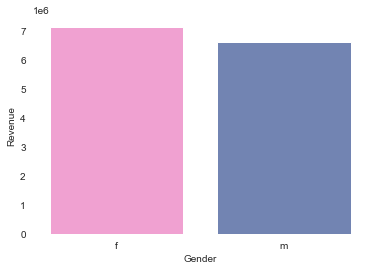

In [74]:
revenue_gender = (
    data.groupby("client_sex")["total_purchase_per_session"].sum().to_frame()
)
revenue_gender.reset_index(inplace=True)

colors = ["#fd94d4", "#6780bd"]
sns.set_palette(sns.color_palette(colors))

sns.barplot(x="client_sex", y="total_purchase_per_session", data=revenue_gender)
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.box(False)
plt.show()

[Back to task overview](#task_3)

<hr style="border:1.5px solid blalck"> </hr>
Correlation between age and  the total amount of purchases<br>
<a id='task_3_2'></a>

In [75]:
# Create a subset groupped by client, age and their total purchase amount
age_purchase = (
    data.groupby(["client_id", "client_age"])["total_purchase_per_session"]
    .sum()
    .to_frame()
)
age_purchase.reset_index(inplace=True)
age_purchase.rename(
    columns={"total_purchase_per_session": "purchase_per_client"}, inplace=True
)
age_purchase

,client_id,client_age,purchase_per_client
0,c_1,67,715.42
1,c_10,66,1360.18
2,c_100,30,486.11
3,c_1000,56,1958.82
4,c_1001,40,4359.66
...,...,...,...
8591,c_995,67,198.18
8592,c_996,52,960.70
8593,c_997,28,1402.37
8594,c_998,21,3705.35


Text(0, 0.5, 'Total purchase per client')

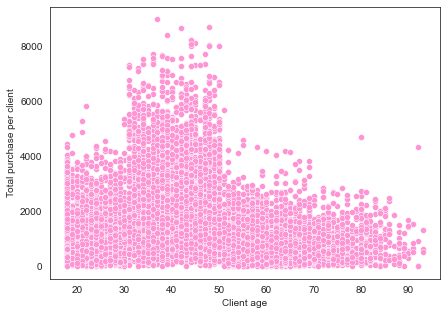

In [76]:
# Looking at how data is spread using a scatter plot
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x="client_age", y="purchase_per_client", data=age_purchase)
ax.set_xlabel("Client age")
ax.set_ylabel("Total purchase per client")

<font color='blue'>This graph suggest a non-linear association. Applying the Spearman correlation.</font>

In [77]:
# First organizing data by age (discrete interger) and the average purchase amount for each age.
age_purchase = (
    age_purchase.groupby("client_age")["purchase_per_client"].mean().to_frame()
)
age_purchase.reset_index(inplace=True)
age_purchase.rename(columns={"purchase_per_client": "avg_purchase_total"}, inplace=True)
age_purchase

,client_age,avg_purchase_total
0,18,1365.051854
1,19,1214.935172
2,20,1243.581517
3,21,1364.131040
4,22,1272.062426
...,...,...
71,89,591.527500
72,90,993.600000
73,91,906.655000
74,92,1330.525000


In [78]:
# Ranking the two variables
age_purchase["age_ranked"] = age_purchase["client_age"].rank()
age_purchase["purchase_total_ranked"] = age_purchase["avg_purchase_total"].rank()
age_purchase

,client_age,avg_purchase_total,age_ranked,purchase_total_ranked
0,18,1365.051854,1.0,54.0
1,19,1214.935172,2.0,42.0
2,20,1243.581517,3.0,45.0
3,21,1364.131040,4.0,53.0
4,22,1272.062426,5.0,47.0
...,...,...,...,...
71,89,591.527500,72.0,2.0
72,90,993.600000,73.0,30.0
73,91,906.655000,74.0,16.0
74,92,1330.525000,75.0,52.0


<font color='blue'>Calculating the r value for the ranked variables
    r value =
$\sum((agerank - \bar{agerank})(purchaserank - \bar{purchaserank})) / \sqrt{\sum(agerank-\bar{agerank})²} \sqrt{\sum(purchaserank - \bar{purchaserank})²}$
</font>

In [79]:
age_mean = age_purchase["age_ranked"].mean()
purchase_mean = age_purchase["purchase_total_ranked"].mean()

age_purchase_spearman_r = (
    (age_purchase["age_ranked"] - age_mean)
    * (age_purchase["purchase_total_ranked"] - purchase_mean)
).sum() / (
    np.sqrt(((age_purchase["age_ranked"] - age_mean) ** 2).sum())
    * np.sqrt(((age_purchase["purchase_total_ranked"] - purchase_mean) ** 2).sum())
)
age_purchase_spearman_r

-0.6825427204374572

<font color='blue'>Or simply use .pearsonr function on the ranked columns to get the Spearman R...</font>

In [80]:
import scipy.stats as st

st.pearsonr(age_purchase["age_ranked"], age_purchase["purchase_total_ranked"])

(-0.6825427204374572, 1.1181522952639332e-11)

<font color='blue'>r square value is then...</font>

In [81]:
age_purchase_spearman_r_sqr = age_purchase_spearman_r ** 2
age_purchase_spearman_r_sqr

0.4658645652221649

<font color='blue'>A even faster way to get the Spearman R without ranking the variables at all...
   
</font>

In [82]:
st.spearmanr(age_purchase["client_age"], age_purchase["avg_purchase_total"])

SpearmanrResult(correlation=-0.6825427204374573, pvalue=1.1181522952639219e-11)

<font color='blue'>This function also gives a p value which is very small, further strengthens the rejection of the null hypothesis.</font>

[Back to task overview](#task_3)

<a id='task_3_3'></a>

<hr style="border:1.5px solid blalck"> </hr>
Correlation between age and the purchase frequency (the number of purchases per month for example)<br>

In [83]:
# Create the age/ monthly_frequency subset
age_frequency = (
    data.groupby(["client_age", "session_month"])["session_id"].count().to_frame()
)
age_frequency.reset_index(inplace=True)
age_frequency.rename(columns={"session_id": "monthly_frequency"}, inplace=True)
age_frequency = (
    age_frequency.groupby("client_age")["monthly_frequency"].mean().to_frame()
)
age_frequency.reset_index(inplace=True)
age_frequency

,client_age,monthly_frequency
0,18,612.333333
1,19,181.833333
2,20,185.333333
3,21,169.333333
4,22,181.250000
...,...,...
71,89,13.666667
72,90,13.250000
73,91,7.000000
74,92,9.583333


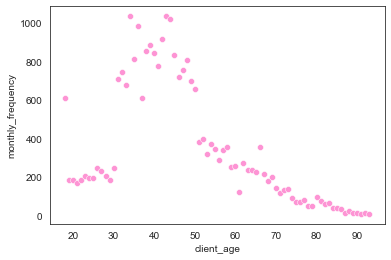

In [84]:
sns.scatterplot(x="client_age", y="monthly_frequency", data=age_frequency)
plt.show()

In [85]:
st.spearmanr(age_frequency["client_age"], age_frequency["monthly_frequency"])

SpearmanrResult(correlation=-0.6732740943267259, pvalue=2.6779028416585716e-11)

<font color='blue'>The Spreaman correlation is -0.67, indicating a strong relationship in the negative direction between clients' age and the frequency of purchase. The very small p value indicate that our test result is very unlikely to have occured should the null hypothesis be true. Therefore the nullhypothesis is rejected. </font>

[Back to task overview](#task_3)

<a id='task_3_4'></a>

<hr style="border:1.5px solid blalck"> </hr>
Correlation between age and the average basket size (in number of items)<br>


In [86]:
# Creating subset of data with each client, their age and their total basket size
age_avg_basket = data.groupby(["client_age", "client_id"])["id_prod"].count().to_frame()
age_avg_basket.reset_index(inplace=True)

# Getting the mean basket size for every discrete age
age_avg_basket = age_avg_basket.groupby("client_age")["id_prod"].mean().to_frame()
age_avg_basket.rename(columns={"id_prod": "avg_basket"}, inplace=True)
age_avg_basket.reset_index(inplace=True)
age_avg_basket

,client_age,avg_basket
0,18,16.814645
1,19,15.048276
2,20,15.337931
3,21,16.256000
4,22,15.992647
...,...,...
71,89,20.500000
72,90,26.500000
73,91,21.000000
74,92,28.750000


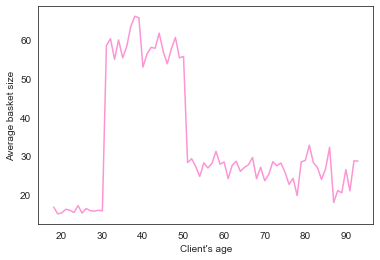

In [87]:
plt.plot(age_avg_basket["client_age"], age_avg_basket["avg_basket"])
plt.xlabel("Client's age")
plt.ylabel("Average basket size")
plt.show()

<font color='blue'>The relationship appears nonlinear. First trying the Spearman correlation.</font>

In [88]:
st.spearmanr(age_avg_basket["client_age"], age_avg_basket["avg_basket"])

SpearmanrResult(correlation=0.01192071086807929, pvalue=0.9185950513935155)

<font color='blue'>The Spearman r value is very small, indicating a weak relationship. However, by looking at the graph there IS a association between the two variables. <br>
Instead, transforming the two variables into categorical variables, followed by a chi² test, might yeild a better depiction.</font>

In [89]:
# Generate bins for each variable
age_groupped = pd.cut(x=age_avg_basket["client_age"], bins=[16, 30, 49, 69, 99])
basket_groupped = pd.cut(x=age_avg_basket["avg_basket"], bins=[10, 20, 30, 40, 50, 60])

In [90]:
crosstable_age_basket = pd.crosstab(age_groupped, basket_groupped)
crosstable_age_basket

avg_basket,"(10, 20]","(20, 30]","(30, 40]","(50, 60]"
client_age,,,,
"(16, 30]",13,0,0,0
"(30, 49]",0,0,0,13
"(49, 69]",0,18,1,1
"(69, 99]",2,20,2,0


In [91]:
# Chi² test
chiVal, pVal, df, exp = chi2_contingency(crosstable_age_basket)
chiVal.round(2), pVal, df, exp

(122.29,
 4.529497933361384e-22,
 9,
 array([[ 2.78571429,  7.05714286,  0.55714286,  2.6       ],
        [ 2.78571429,  7.05714286,  0.55714286,  2.6       ],
        [ 4.28571429, 10.85714286,  0.85714286,  4.        ],
        [ 5.14285714, 13.02857143,  1.02857143,  4.8       ]]))

<font color='blue'>The critical value for this test is 16.919. The result chi² statistics is 122.29, higher than the critical value. Additionally the p value is very small. Therefore null hypothesis is rejected. There is a relationship between age and average basket size.</font>

[Back to task overview](#task_3)

<a id='task_3_5'></a>

<hr style="border:1.5px solid blalck"> </hr>
Correlation between age and categories of purchased products<br>

<font color='blue'>Proportions of revenue per product category.</font>

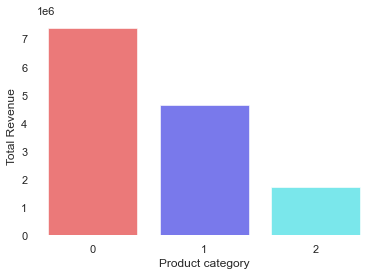

In [92]:
# Total revenue per product category
product_categ_revenue = (
    data.groupby("product_categ")["total_purchase_per_session"].sum().to_frame()
)
product_categ_revenue.reset_index(inplace=True)

palette1 = ["red", "blue", "#01f6fe"]
sns.set_theme(style="white")
sns.barplot(
    x="product_categ",
    y="total_purchase_per_session",
    data=product_categ_revenue,
    alpha=0.6,
    palette=palette1,
)
plt.xlabel("Product category")
plt.ylabel("Total Revenue")
plt.box(False)
plt.show()

In [93]:
# First create the subset
age_product_categ_1 = (
    data.groupby(["client_age", "product_categ"])["id_prod"].count().to_frame()
)

age_product_categ_1.reset_index(inplace=True)
age_product_categ_1.rename(columns={"id_prod": "qty_sold"}, inplace=True)
age_product_categ_1

,client_age,product_categ,qty_sold
0,18,0,1668
1,18,1,2759
2,18,2,2921
3,19,0,488
4,19,1,817
...,...,...,...
222,92,0,43
223,92,1,71
224,92,2,1
225,93,0,35


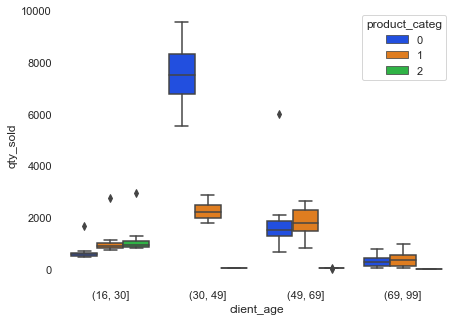

In [103]:
# Getting a visual representation with client age groupped
age_grouped = pd.cut(x=age_product_categ_1["client_age"], bins=[16, 30, 49, 69, 99])

plt.figure(figsize=(7, 5))
sns.set_theme(style="white", palette="bright")
sns.boxplot(x=age_grouped, y="qty_sold", hue="product_categ", data=age_product_categ_1)
plt.box(False)
plt.show()

<font color='blue'>From just looking at the graph, we can observe that there appears to be an association between clients' age and the category of product that they purchase.<br>
To quantify this theory, I will do an one way ANOVA test.</font>

<font color='blue'>First calculate step by step, then followed by the same test done by scipy library.</font>

In [95]:
# Pivot table to get the table I will use for later calculation
age_product_categ = age_product_categ_1.pivot_table(
    index="client_age", columns="product_categ", values="qty_sold"
)

# Filling NaN value with 0
age_product_categ.fillna(0, inplace=True)

age_product_categ

product_categ,0,1,2
client_age,,,
18,1668.0,2759.0,2921.0
19,488.0,817.0,877.0
20,498.0,830.0,896.0
21,461.0,732.0,839.0
22,587.0,791.0,797.0
...,...,...,...
89,71.0,92.0,1.0
90,73.0,85.0,1.0
91,36.0,47.0,1.0


In [96]:
# Getting the means of each group
group_mean = age_product_categ.mean()

# Grand mean
grand_mean = group_mean.mean()

# Total Sum of Square = sum((individual_measure - grand_mean)**2)
TSS = ((age_product_categ - grand_mean) ** 2).sum().sum()

# ESS, or the explained sum of square, or the sum of square between groups
ESS = (((group_mean - grand_mean) ** 2) * age_product_categ.shape[0]).sum()

# RSS, or the residual sum of square, or sum of square within groups
RSS = ((age_product_categ - group_mean) ** 2).sum().sum()

In [97]:
# Degrees of freedom total
df_total = np.prod(age_product_categ.shape) - 1

# Degrees of freedom explainded (or between groups)
df_explained = age_product_categ.shape[1] - 1

## Degrees of freedom residual (or within groups)
df_residual = age_product_categ.shape[1] * (age_product_categ.shape[0] - 1)

# Total variance
grand_variance = TSS / df_total

# Explained variance
explained_variance = ESS / df_explained

# Residual variance
residual_variance = RSS / df_residual

<font color='blue'>The null hypothesis for this test is: clients' age does not affect the category of product that they purchase.<br>
Alternative hypothesis: clients' age does affect the category of product that they purchase.<br>
Let's look at the result.</font>

In [98]:
print("Sum of square total:", TSS)
print("Sum of square explained/between:", ESS)
print("Sum of square residual/within:", RSS)
print("eta²:", ESS / TSS)
print("Degrees of freedom explained/between:", df_explained)
print("Degrees of freedom residual/within:", df_residual)
print("F statistics:", explained_variance / residual_variance)

Sum of square total: 1006267622.9956142
Sum of square explained/between: 212081558.6929825
Sum of square residual/within: 794186064.3026316
eta²: 0.21076059076771753
Degrees of freedom explained/between: 2
Degrees of freedom residual/within: 225
F statistics: 30.04229918578473


<font color='blue'>Given degrees of freedom explained/between and residual/within at 2 and 225 respectively, assuming alpha value at 0.05, according to F distribution table, our critical cut of value for this test is 2.9957.<br>
The f statistics of this test is higher than critical f statistic, therefore the null hypothesis is rejected. Thus we can state that the clients' age __does__  affect the category of product that they purchase.<br>The eta² tells us that 21.06% of the variation of the purchase quantity by different age, is accounted for by the category of product.</font>

<font color='blue'>Calculating the f statistics using scipy library.</font>

In [99]:
import scipy.stats as stats

stats.f_oneway(age_product_categ[0], age_product_categ[1], age_product_categ[2])

F_onewayResult(statistic=30.042299185784717, pvalue=2.728888667930591e-12)

<font color='blue'>The f statistics number from scipy library is different from that of step by step calculation. This is due to the trailling off of numbers after the decimal point being squared. However this difference does not impect the test outcome. The null hypothesis is still rejected.<br>
Moreover, this function also gives us the p-value, which is very small. This tells us that it is highly unlikely that we would get a f statistics of 30 should the null hypothesis actually be true.</font>

[Back to task overview](#task_3)<br>
[Back to top](#top)

<hr style="border:1.5px solid blalck"></hr>
<font color='blue'>A final visual representation of the correlation analyzed.</font>

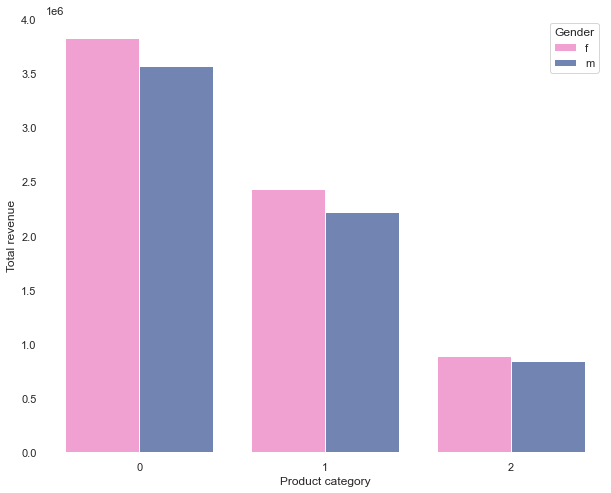

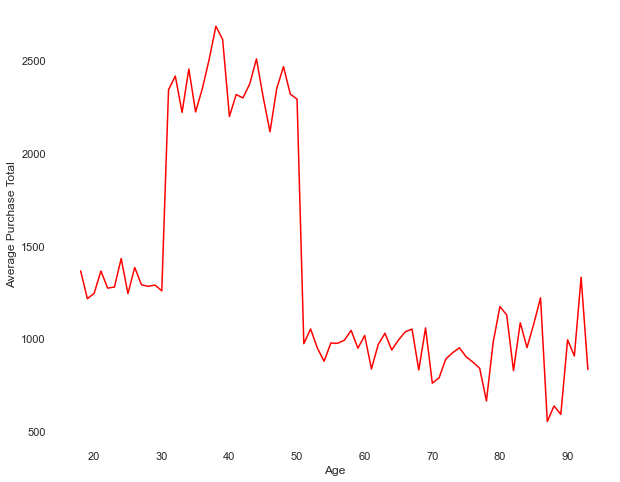

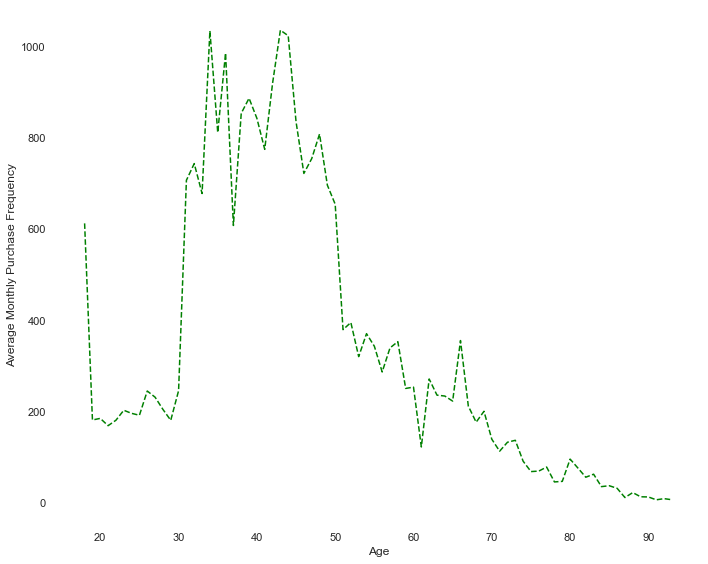

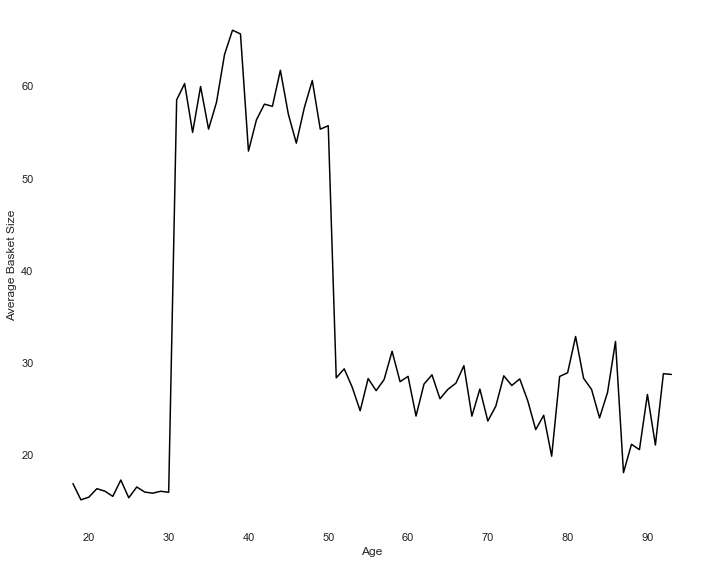

In [100]:
sns.set_style("white")

# Bar chart for gender/product category
gender_categ = (
    data.groupby(["client_sex", "product_categ"])["total_purchase_per_session"]
    .sum()
    .to_frame()
)
gender_categ.reset_index(inplace=True)
gender_categ.columns = ["Gender", "Product category", "Total revenue"]

plt.figure(figsize=(10, 8))
colors = ["#fd94d4", "#6780bd"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(
    x="Product category", y="Total revenue", hue="Gender", data=gender_categ, ci=None,
)
plt.box(False)
plt.show()

# Line plot for age/ purchase total
plt.figure(figsize=(10, 8))
plt.plot(
    age_purchase["client_age"],
    age_purchase["avg_purchase_total"],
    linestyle="solid",
    label="age/average total purchase",
    color="red",
)
plt.box(False)
plt.xlabel("Age")
plt.ylabel("Average Purchase Total")
plt.show()

# Line plot for age/ monthly purchase frequency
plt.figure(figsize=(10, 8))
plt.plot(
    age_frequency["client_age"],
    age_frequency["monthly_frequency"],
    linestyle="dashed",
    label="age/average monthly purchase frequenecy",
    color="green",
)
plt.xlabel("Age")
plt.ylabel("Average Monthly Purchase Frequency")
plt.tight_layout()
plt.box(False)
plt.show()

# Line plot for age/ average baske size
plt.figure(figsize=(10, 8))
plt.plot(
    age_avg_basket["client_age"],
    age_avg_basket["avg_basket"],
    linestyle="solid",
    label="age/average basket size",
    color="black",
)


plt.xlabel("Age")
plt.ylabel("Average Basket Size")
plt.tight_layout()
plt.box(False)
plt.show()

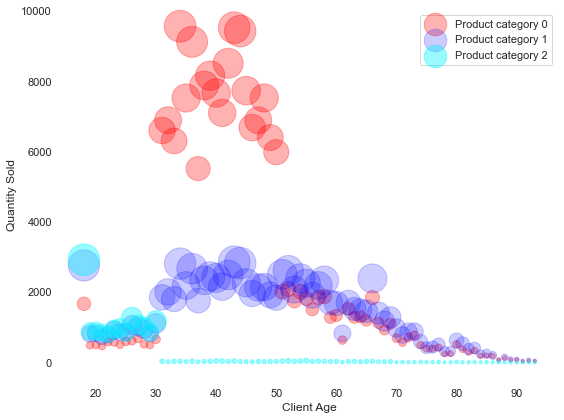

In [101]:
# Create a bubble plot for visual representation of the products sold per category/age

age_product_categ.reset_index(inplace=True)
age_product_categ.columns = ["client_age", "product_0", "product_1", "product_2"]

categ_0_normalized = (
    age_product_categ["product_0"] - age_product_categ["product_0"].min()
) / (age_product_categ["product_0"].max() - age_product_categ["product_0"].min())
categ_1_normalized = (
    age_product_categ["product_1"] - age_product_categ["product_1"].min()
) / (age_product_categ["product_1"].max() - age_product_categ["product_1"].min())
categ_2_normalized = (
    age_product_categ["product_2"] - age_product_categ["product_2"].min()
) / (age_product_categ["product_2"].max() - age_product_categ["product_2"].min())


ax0 = age_product_categ.plot(
    kind="scatter",
    x="client_age",
    y="product_0",
    alpha=0.3,
    s=categ_0_normalized * 1000 + 10,
    figsize=(8, 6),
    color="red",
)
ax1 = age_product_categ.plot(
    kind="scatter",
    x="client_age",
    y="product_1",
    alpha=0.2,
    s=categ_1_normalized * 1000 + 10,
    color="blue",
    ax=ax0,
)
ax2 = age_product_categ.plot(
    kind="scatter",
    x="client_age",
    y="product_2",
    alpha=0.4,
    s=categ_2_normalized * 1000 + 10,
    color="#01f6fe",
    ax=ax0,
)
ax0.set_xlabel("Client Age")
ax0.set_ylabel("Quantity Sold")
ax0.legend(
    ["Product category 0", "Product category 1", "Product category 2"],
    loc="upper right",
)
plt.tight_layout()
plt.box(False)
plt.show()

[Back to top](#top)